In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_decision_regions
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
np.random.seed(42)
n_samples = 30 # n_samples instead of 20 samples

# distributions centered at +- 1.5 instead of +- 1.25
X1 = np.random.normal(loc=-1.5, scale=1, size=n_samples)
X2 = np.random.normal(loc=1.5, scale=1, size=n_samples)
X = np.hstack((X1, X2))

# y for normal X distributions 1 or 2
y1 = np.ones(shape=n_samples, dtype=int)
y2 = np.full(n_samples, 2, dtype=int)
y = np.hstack((y1, y2))

In [3]:
data = pd.DataFrame({
    'X': X,
    'y': y,
})

In [4]:
X = X.reshape(-1, 1)
classifier = LinearDiscriminantAnalysis()
classifier.fit(X, y)

LinearDiscriminantAnalysis()

In [5]:
X_pred = np.linspace(start=-1, stop=1, num=1000).reshape(-1, 1)
y_pred = classifier.predict_proba(X_pred)

In [6]:
decision_boundary_index = abs(y_pred[:, 1] - 0.5).argmin()
decision_boundary = X_pred[decision_boundary_index]

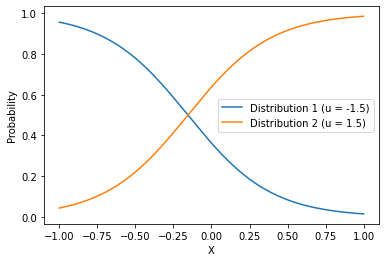

In [7]:
# Plot probability that X belongs to each distribution
plt.plot(X_pred, y_pred)
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend([
    'Distribution 1 (u = -1.5)', 
    'Distribution 2 (u = 1.5)'
])
plt.show()

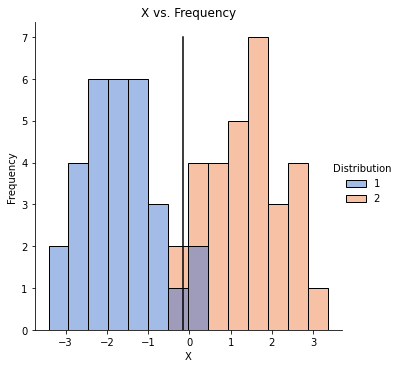

In [8]:
# plot distributions and LDA decision boundary
distribution_plot = sns.displot(
    data=data, 
    x='X', 
    bins=14, 
    hue='y', 
    palette='muted'
)
distribution_plot.set(
    title='X vs. Frequency',
    ylabel='Frequency',
)
# edit seaborn legend https://stackoverflow.com/questions/45201514/
distribution_plot.legend.set_title('Distribution')
plt.plot([decision_boundary, decision_boundary], [0, 7], color='black')
plt.show()

In [9]:
# multivariate distributions
np.random.seed(42)
cov = np.diag(v=[1.5, 1.25])
means = [[-1, -1], [1, 3], [3, 0]]

X_multivariates = []
for mean in means:
    observations = np.random.multivariate_normal(mean=mean, cov=cov, size=n_samples)
    X_multivariates.append(observations)
X_multivariate = np.vstack(tuple(X_multivariates))

# y for multivariate X distributions 1, 2 or 3
y3 = np.full(n_samples, 3, dtype=int)
y_multivariate = np.hstack((y, y3))

In [10]:
multivariate_data = pd.DataFrame({
    'X1': X_multivariate[:, 0],
    'X2': X_multivariate[:, 1],
    'y': y_multivariate
})

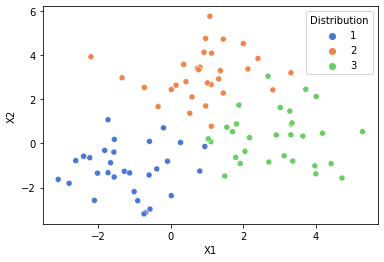

In [11]:
multivariate_scatterplot = sns.scatterplot(
    data=multivariate_data, 
    x='X1', 
    y='X2', 
    hue='y',
    palette='muted'
)
multivariate_scatterplot.legend(title='Distribution')
plt.show()

In [12]:
classifier.fit(X_multivariate, y_multivariate)

LinearDiscriminantAnalysis()

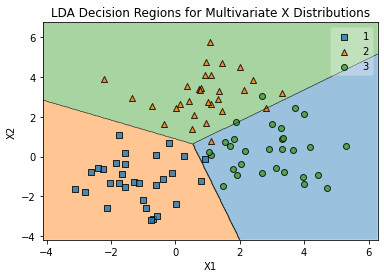

In [13]:
# help(plot_decision_regions) # mlextend
plot_decision_regions(
    X_multivariate, 
    y_multivariate, 
    clf=classifier, 
    hide_spines=False
)
plt.title('LDA Decision Regions for Multivariate X Distributions')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()